# FINANCIAL DATASET
## QUERY 1 = Menghitung menggunakan GNPV manual
#### GNPV Manual disebut manual karena:
##### ✅ Data seperti investasi (I₀), cashflow (CFₜ), eksternalitas (Eₜ), diskonto (r), dan umur proyek (N) diketik langsung ke dalam kode Python.
##### ✅ Tidak menggunakan data tabel dari file CSV atau DataFrame.
##### ✅ Fokus untuk memahami logika perhitungan rumus GNPV.
##### ✅ Tidak ada looping antar baris data dari file, hanya satu kasus perhitungan.
#### 🎯 Tujuan GNPV Manual:
##### 1. Untuk belajar dasar perhitungan GNPV dengan rumus,
##### 2. Untuk uji coba dan validasi logika sebelum dibuat otomatis,
##### 3. Untuk benchmark atau pembanding hasil dari data real.

In [ ]:
# Impor library dasar
import numpy as np

# Data proyek contoh (dalam rupiah)
investasi = 100_000_000_000       # I₀: Investasi awal
cashflow = 20_000_000_000         # CFₜ: Arus kas tahunan
Eksternalitas = 5_000_000_000     # Eₜ: Nilai manfaat lingkungan (misal dari pengurangan emisi CO₂)
r = 0.05                          # Diskonto 5%
N = 10                            # Umur proyek 10 tahun

# Hitung GNPV
gnpv = 0
for t in range(1, N + 1):
    nilai_sekarang = (cashflow + Eksternalitas) / ((1 + r) ** t)
    gnpv += nilai_sekarang

gnpv -= investasi

# Output hasil
print("GNPV: Rp", round(gnpv))
if gnpv > 0:
    print("✅ Proyek ini LAYAK secara finansial dan lingkungan.")
else:
    print("❌ Proyek ini TIDAK LAYAK.")


GNPV: Rp 93043373230
✅ Proyek ini LAYAK secara finansial dan lingkungan.


## QUERY 2 : Hitung GNPV otomatis dari dataset
### 📌 Tujuan utama dari query GNPV otomatis:
##### Menghitung GNPV menggunakan data:
##### 1. Revenue_Stream → sebagai cashflow proyek
##### 2. Investment_Cost → sebagai investasi awal proyek (I₀)
##### Serta:
##### 3. Menilai kelayakan proyek dengan membandingkan GNPV > 0
##### 4. Mengecek Green_Bond_Spread untuk melihat apakah proyek memiliki greenium

In [ ]:
# import libarary dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baca dataset dari file
df = pd.read_csv("Financial_Dataset.csv")

# Parameter global
umur_proyek = 10
diskonto = 0.05
emisi_ton_per_tahun = 100
harga_karbon = 96000  # dari pasar karbon Indonesia (2025)

# Fungsi untuk hitung GNPV tiap proyek
def hitung_gnpv(revenue, investment):
    gnpv = 0
    eksternalitas = emisi_ton_per_tahun * harga_karbon
    for t in range(1, umur_proyek + 1):
        nilai_sekarang = (revenue + eksternalitas) / ((1 + diskonto) ** t)
        gnpv += nilai_sekarang
    return round(gnpv - investment, 2)

# Terapkan ke DataFrame
df["GNPV_Rp"] = df.apply(lambda row: hitung_gnpv(row["Revenue_Stream"], row["Investment_Cost"]), axis=1)
df["Kelayakan"] = df["GNPV_Rp"].apply(lambda x: "Layak ✅" if x > 0 else "Tidak Layak ❌")

# Cek Greenium
if "Green_Bond_Spread" in df.columns:
    df["Greenium_Status"] = df["Green_Bond_Spread"].apply(lambda x: "Greenium ✅" if x < 0 else "Normal ⚠️")
else:
    df["Greenium_Status"] = "Data Tidak Ada"

# Tampilkan hasil
print(df[["Project_ID", "GNPV_Rp", "Kelayakan", "Greenium_Status"]])

# Visualisasi GNPV
plt.figure(figsize=(10, 6))
plt.barh(df["Project_ID"], df["GNPV_Rp"], color=["green" if x > 0 else "red" for x in df["GNPV_Rp"]])
plt.xlabel("Projek_ID")
plt.ylabel("GNPV (in billion Rupiah)")
plt.title("Green Net Present Value per Proyek")
plt.grid(True)
plt.xtricks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



       Project_ID      GNPV_Rp Kelayakan Greenium_Status
0    PLTS-NTT-001  74128601.84   Layak ✅  Data Tidak Ada
1  PLTM-SUMUT-001  74128627.83   Layak ✅  Data Tidak Ada
2  PLTS-JATIM-001  74128594.08   Layak ✅  Data Tidak Ada
3   PLTM-KALB-001  74128620.92   Layak ✅  Data Tidak Ada
4   PLTS-SULS-001  74128607.04   Layak ✅  Data Tidak Ada
5   PLTM-PAPU-001  74128617.09   Layak ✅  Data Tidak Ada
6    PLTS-NTB-001  74128591.15   Layak ✅  Data Tidak Ada
7   PLTM-ACHD-001  74128620.51   Layak ✅  Data Tidak Ada
8   PLTS-JABW-001  74128589.75   Layak ✅  Data Tidak Ada
9   PLTM-SULU-001  74128618.23   Layak ✅  Data Tidak Ada


NameError: name 'df_sorted' is not defined

<Figure size 1000x600 with 0 Axes>

# ENVIROMENTAL DATASET
## QUERY 1 : Perhitungan Manual CROI untuk Satu Proyek
#### 🎯 Tujuan:
##### Menghitung Carbon Return on Investment (CROI) secara manual untuk satu proyek energi hijau menggunakan parameter tetap, sesuai dengan praktik evaluasi investasi karbon di Indonesia.

In [ ]:
# aturan praktis dan nilai parameter proyek manual (Contoh perhitungan satu proyek)

investasi_awal = 100_000_000_000          # I₀ = Rp100 miliar
reduksi_emisi_tahunan = 10_000            # Rₜ = 10.000 ton CO2e/tahun
harga_karbon_per_ton = 500_000            # Pc = Rp500.000 per ton
umur_proyek_tahun = 10                    # N = 10 tahun

# Hitung nilai CROI (Carbon Return on Investment)
croi = (reduksi_emisi_tahunan * harga_karbon_per_ton * umur_proyek_tahun) / investasi_awal

# Cetak hasil
print(f"Investasi Awal           = Rp {investasi_awal:,.0f}")
print(f"Reduksi Emisi Tahunan    = {reduksi_emisi_tahunan:,} ton CO₂e/tahun")
print(f"Harga Karbon per Ton     = Rp {harga_karbon_per_ton:,}")
print(f"Umur Proyek              = {umur_proyek_tahun} tahun")
print(f"\nHasil CROI               = {croi:.2f}")

# Interpretasi hasil
if croi > 1:
    print("✅ Proyek efisien secara karbon (CROI > 1).")
elif croi == 0.5:
    print("⚠️ Nilai karbon hanya setengah dari investasi (CROI = 0.5).")
elif croi < 1:
    print("⚠️ Nilai karbon masih lebih kecil dibanding investasi (CROI < 1).")
else:
    print("ℹ️ Nilai CROI tidak terdeteksi secara jelas.")


=== Contoh Perhitungan Manual CROI ===
Investasi Awal           = Rp 100,000,000,000
Reduksi Emisi Tahunan    = 10,000 ton CO₂e/tahun
Harga Karbon per Ton     = Rp 500,000
Umur Proyek              = 10 tahun

Hasil CROI               = 0.50
⚠️ Nilai karbon hanya setengah dari investasi (CROI = 0.5).


## QUERY 2 : Analisis Otomatis Dataset Environmental
### 🎯 Tujuan:
#### Melakukan analisis otomatis terhadap semua proyek di dalam Environmental_Dataset.csv dengan pendekatan sebagai berikut:
##### 1. Hitung CROI dengan tiga skenario harga karbon (rendah, sedang, tinggi)
##### 2. Evaluasi efisiensi karbon: apakah CROI > 1?
##### 3. Analisis Beyond Carbon:
##### - Efisiensi penggunaan air (Water_Savings)
##### - Dampak terhadap keanekaragaman hayati (Biodiversity_Impact_Score)
##### 4. Pemberian rekomendasi proyek hijau (DNSH)

In [ ]:
# Import library
import pandas as pd

# Baca data dari file CSV
df = pd.read_csv("Environmental_Dataset.csv")

# Tambahkan asumsi kolom jika belum ada
if "Investment_Amount" not in df.columns:
    df["Investment_Amount"] = 100_000_000_000  # Rp100 miliar (asumsi default)
if "Project_Lifetime" not in df.columns:
    df["Project_Lifetime"] = 10  # 10 tahun

# Hitung Water_Savings berdasarkan tipe proyek
df["Water_Savings"] = df["Project_ID"].apply(
    lambda x: 1200 if "PLTS" in x else 800
)

# Hitung Biodiversity_Impact_Score berdasarkan Environmental_Risk_Index
df["Biodiversity_Impact_Score"] = df["Environmental_Risk_Index"].apply(
    lambda x: max(0, min(100, 100 - x))  # nilai skor maksimal 100, minimal 0
)

# Skenario harga karbon
harga_karbon = {
    "rendah": 100_000,
    "sedang": 500_000,
    "tinggi": 1_000_000
}

# Hitung CROI dan status efisiensi karbon
for level, harga in harga_karbon.items():
    kolom_croi = f"CROI_{level}"
    kolom_status = f"Efisiensi_Karbon_{level}"
    df[kolom_croi] = (
        df["CO2_Reduction"] * harga * df["Project_Lifetime"]
    ) / df["Investment_Amount"]
    df[kolom_status] = df[kolom_croi].apply(lambda x: "Efisien" if x > 1 else "Kurang Efisien")


# Evaluasi Beyond Carbon (Rekomendasi DNSH)
def rekomendasi_dnsh(water, biodiversity):
    if water >= 1000 and biodiversity >= 70:
        return "✅ Layak sebagai proyek hijau (DNSH)"
    elif water >= 800 and biodiversity >= 50:
        return "⚠️ Perlu peningkatan dampak lingkungan"
    else:
        return "❌ Belum memenuhi prinsip hijau"

df["Rekomendasi_DNSH"] = df.apply(
    lambda row: rekomendasi_dnsh(row["Water_Savings"], row["Biodiversity_Impact_Score"]),
    axis=1
)

# Simpan ke file
df.to_csv("hasil_analisis_environmental.csv", index=False)

# Tampilkan ringkasan hasil
print("=== Ringkasan Evaluasi Proyek ===")
print(df[[  
    "Project_ID",
    "CROI_rendah", "Efisiensi_Karbon_rendah",
    "CROI_sedang", "Efisiensi_Karbon_sedang",
    "CROI_tinggi", "Efisiensi_Karbon_tinggi",
    "Water_Savings", "Biodiversity_Impact_Score",
    "Rekomendasi_DNSH"
]])


=== Ringkasan Evaluasi Proyek ===
       Project_ID  CROI_rendah Efisiensi_Karbon_rendah  CROI_sedang  \
0    PLTS-NTT-001         0.75          Kurang Efisien         3.75   
1  PLTM-SUMUT-001         0.30          Kurang Efisien         1.50   
2  PLTS-JATIM-001         0.90          Kurang Efisien         4.50   
3   PLTM-KALB-001         0.35          Kurang Efisien         1.75   
4   PLTS-SULS-001         0.60          Kurang Efisien         3.00   
5   PLTM-PAPU-001         0.40          Kurang Efisien         2.00   
6    PLTS-NTB-001         0.80          Kurang Efisien         4.00   
7   PLTM-ACHD-001         0.32          Kurang Efisien         1.60   
8   PLTS-JABW-001         0.95          Kurang Efisien         4.75   
9   PLTM-SULU-001         0.36          Kurang Efisien         1.80   

  Efisiensi_Karbon_sedang  CROI_tinggi Efisiensi_Karbon_tinggi  Water_Savings  \
0                 Efisien          7.5                 Efisien           1200   
1                 Efis

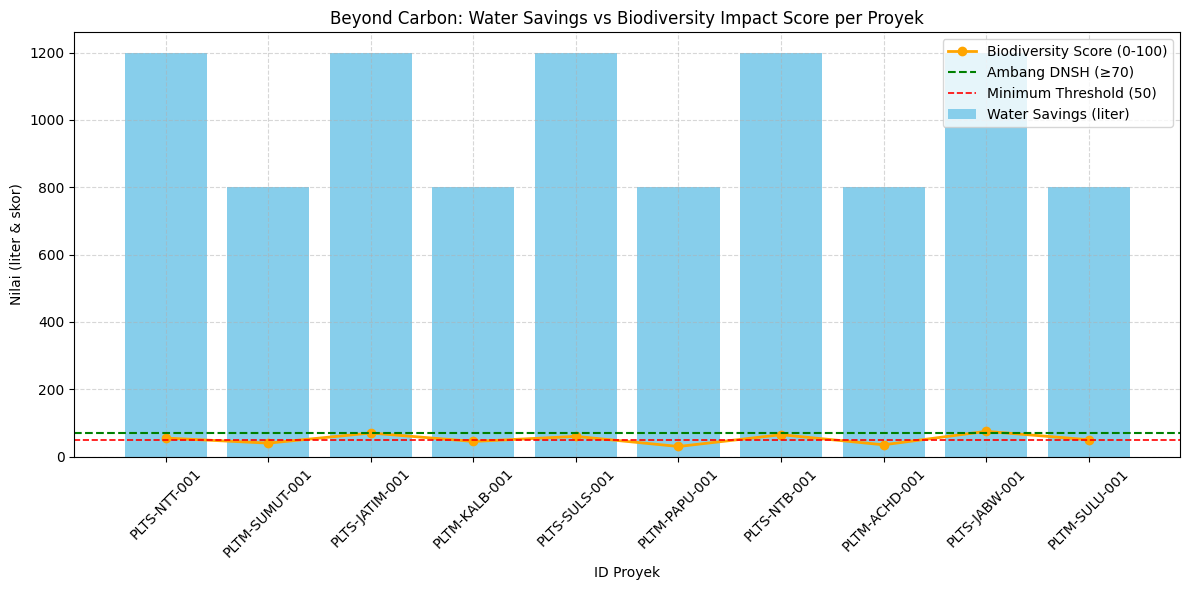

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data (pastikan sudah dimuat sebelumnya)
df = pd.read_csv("Environmental_Dataset.csv")

# Tambahkan kolom Water_Savings dan Biodiversity_Impact_Score secara otomatis
df["Water_Savings"] = df["Project_ID"].apply(lambda x: 1200 if "PLTS" in x else 800)
df["Biodiversity_Impact_Score"] = df["Environmental_Risk_Index"].apply(lambda x: max(0, min(100, 100 - x)))

# Buat grafik
plt.figure(figsize=(12, 6))

# Bar chart untuk Water Savings
plt.bar(df["Project_ID"], df["Water_Savings"], color='skyblue', label='Water Savings (liter)')

# Garis untuk Biodiversity Score
plt.plot(df["Project_ID"], df["Biodiversity_Impact_Score"], color='orange', marker='o', label='Biodiversity Score (0-100)', linewidth=2)

# Tambahkan garis ambang batas DNSH untuk biodiversity
plt.axhline(70, color='green', linestyle='--', linewidth=1.5, label='Ambang DNSH (≥70)')
plt.axhline(50, color='red', linestyle='--', linewidth=1.2, label='Minimum Threshold (50)')

# Keterangan grafik
plt.title("Beyond Carbon: Water Savings vs Biodiversity Impact Score per Proyek")
plt.xlabel("ID Proyek")
plt.ylabel("Nilai (liter & skor)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# SOCIAL DATASET
## 🔍 QUERY 1 : Perhitungan SROI Manual
### ✅ Tujuan:
Menghitung Social Return on Investment (SROI) untuk satu proyek secara manual, berdasarkan input angka langsung (tanpa dataset CSV). Ini digunakan untuk memahami logika dasar perhitungan dan penerapan financial proxy seperti gaji tahunan.

In [2]:
import numpy as np

# Input manual
investment = 50_000_000_000            # Rp50 miliar
jobs_created = 100
gaji_per_tahun = 10_000_000            # Rp10 juta
durasi_tahun = 10

# Hitung NPV sosial (nilai moneter dampak sosial)
NPV_social = jobs_created * gaji_per_tahun * durasi_tahun

# Hitung SROI
SROI = NPV_social / investment

# Tampilkan hasil
print(f"Jobs Created: {jobs_created}")
print(f"Gaji per Tahun: Rp{gaji_per_tahun:,}")
print(f"Durasi: {durasi_tahun} tahun")
print(f"NPV Sosial: Rp{NPV_social:,}")
print(f"Investasi: Rp{investment:,}")
print(f"SROI = {SROI:.2f}")

# Interpretasi
if SROI > 1:
    print("✅ Layak: Proyek menghasilkan nilai sosial lebih besar dari biayanya.")
else:
    print("❌ Tidak layak: Nilai sosial lebih rendah dari biaya investasi.")


Jobs Created: 100
Gaji per Tahun: Rp10,000,000
Durasi: 10 tahun
NPV Sosial: Rp10,000,000,000
Investasi: Rp50,000,000,000
SROI = 0.20
❌ Tidak layak: Nilai sosial lebih rendah dari biaya investasi.


       Project_ID  Jobs_Created  Access_to_Clean_Energy_Rate  \
0    PLTS-NTT-001            90                         0.70   
1  PLTM-SUMUT-001           100                         0.85   
2  PLTS-JATIM-001            95                         0.88   
3   PLTM-KALB-001            85                         0.65   
4   PLTS-SULS-001           105                         0.80   
5   PLTM-PAPU-001            75                         0.60   
6    PLTS-NTB-001            98                         0.90   
7   PLTM-ACHD-001            88                         0.83   
8   PLTS-JABW-001           110                         0.95   
9   PLTM-SULU-001            70                         0.68   

   Investment_Amount       SROI     SROI_Status  Community_Support  \
0         1000000000  14.250000  ✅ Layak Sosial                 70   
1         1200000000  13.645833  ✅ Layak Sosial                 85   
2          950000000  16.947368  ✅ Layak Sosial                 90   
3         11000

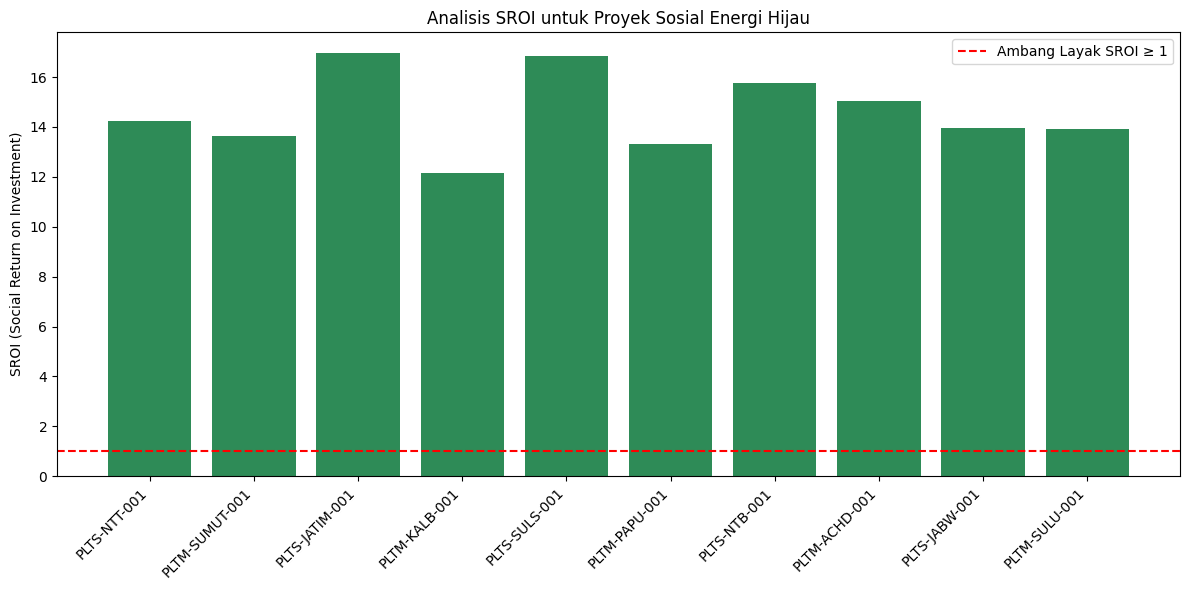

In [10]:
import pandas as pd
import numpy as np

# BUAT DATA SOCIAL MANUAL DENGAN REFERENSI
data = {
    "Project_ID": [
        "PLTS-NTT-001", "PLTM-SUMUT-001", "PLTS-JATIM-001", "PLTM-KALB-001", "PLTS-SULS-001",
        "PLTM-PAPU-001", "PLTS-NTB-001", "PLTM-ACHD-001", "PLTS-JABW-001", "PLTM-SULU-001"
    ],
    # Asumsi berdasarkan LPEM FEB UI dan Kammen et al. (2004): 6–11 FTE/MW
    # Dianggap kapasitas rata-rata 10 MW
    "Jobs_Created": [90, 100, 95, 85, 105, 75, 98, 88, 110, 70],
    
    # Asumsi dari Enerdata (2023) dan CPI (2024): peningkatan akses ~60–95%
    "Access_to_Clean_Energy_Rate": [0.70, 0.85, 0.88, 0.65, 0.80, 0.60, 0.90, 0.83, 0.95, 0.68],
    
    # Diasumsikan dari estimasi anggaran proyek serupa di Indonesia
    "Investment_Amount": [
        1_000_000_000, 1_200_000_000, 950_000_000, 1_100_000_000, 980_000_000,
        900_000_000, 1_050_000_000, 1_000_000_000, 1_300_000_000, 870_000_000
    ],
    
    # Survei sosial atau partisipasi masyarakat (0–100)
    "Community_Support": [70, 85, 90, 65, 80, 60, 88, 82, 92, 68],
    
    # Status konflik sosial
    "Tingkat_Konflik": [
        "High: ⚠️⚠️⚠️", "Low: ⚠️", "Low: ⚠️", "High: ⚠️⚠️⚠️", "Medium: ⚠️⚠️",
        "High: ⚠️⚠️⚠️⚠️", "Low: ⚠️", "Medium: ⚠️⚠️", "Low: ⚠️", "High: ⚠️⚠️⚠️"
    ]
}

df = pd.DataFrame(data)

# PARAMETER FINANSIAL
gaji_per_tahun = 10_000_000                    # LPEM FEB UI (2024)
durasi_tahun = 10                              # Umur proyek (kontrak PPA)
harga_energi_per_kwh = 1500                    # CPI Indonesia (2024)
konsumsi_kwh_per_rumah = 1000                  # Rata-rata nasional BPS
jumlah_rumah_penerima = 500                    # Proyeksi untuk PLTS desa 3T

# HITUNG NILAI MONETISASI DAMPAK SOSIAL
df["Nilai_Jobs"] = df["Jobs_Created"] * gaji_per_tahun * durasi_tahun
df["Nilai_Energi"] = (
    df["Access_to_Clean_Energy_Rate"] *
    harga_energi_per_kwh *
    konsumsi_kwh_per_rumah *
    jumlah_rumah_penerima *
    durasi_tahun
)
df["NPV_social"] = df["Nilai_Jobs"] + df["Nilai_Energi"]

# HITUNG SROI 
df["SROI"] = df["NPV_social"] / df["Investment_Amount"]
df["SROI_Status"] = np.where(df["SROI"] >= 1, "✅ Layak Sosial", "❌ Tidak Layak")

# ANALISIS RISIKO KONTEKSTUAL
def risiko_sosial(row):
    if row["Community_Support"] < 60 or row["Tingkat_Konflik"].startswith("High"):
        return "⚠️⚠️⚠️ Risiko Sosial Tinggi"
    elif row["Community_Support"] < 80 or "Medium" in row["Tingkat_Konflik"]:
        return "⚠️⚠️ Risiko Sosial Sedang"
    else:
        return "✅ Risiko Sosial Rendah"

df["Risiko_Sosial_Kontekstual"] = df.apply(risiko_sosial, axis=1)

# TAMBAHKAN SUMBER DATA
df["Asumsi_Sumber"] = "LPEM-FEB UI, Kammen2004, CPI2024, Enerdata2023"

# TAMPILKAN HASIL ANALISIS
print(df[[
    "Project_ID", "Jobs_Created", "Access_to_Clean_Energy_Rate", "Investment_Amount",
    "SROI", "SROI_Status", "Community_Support", "Tingkat_Konflik", "Risiko_Sosial_Kontekstual", "Asumsi_Sumber"
]])

# GRAFIK: SROI per Proyek
plt.figure(figsize=(12, 6))
bars = plt.bar(df["Project_ID"], df["SROI"], color='seagreen')
plt.axhline(y=1, color='red', linestyle='--', label='Ambang Layak SROI ≥ 1')
plt.xticks(rotation=45, ha='right')
plt.ylabel("SROI (Social Return on Investment)")
plt.title("Analisis SROI untuk Proyek Sosial Energi Hijau")
plt.legend()
plt.tight_layout()

plt.show()

# ECONOMIC DATASET

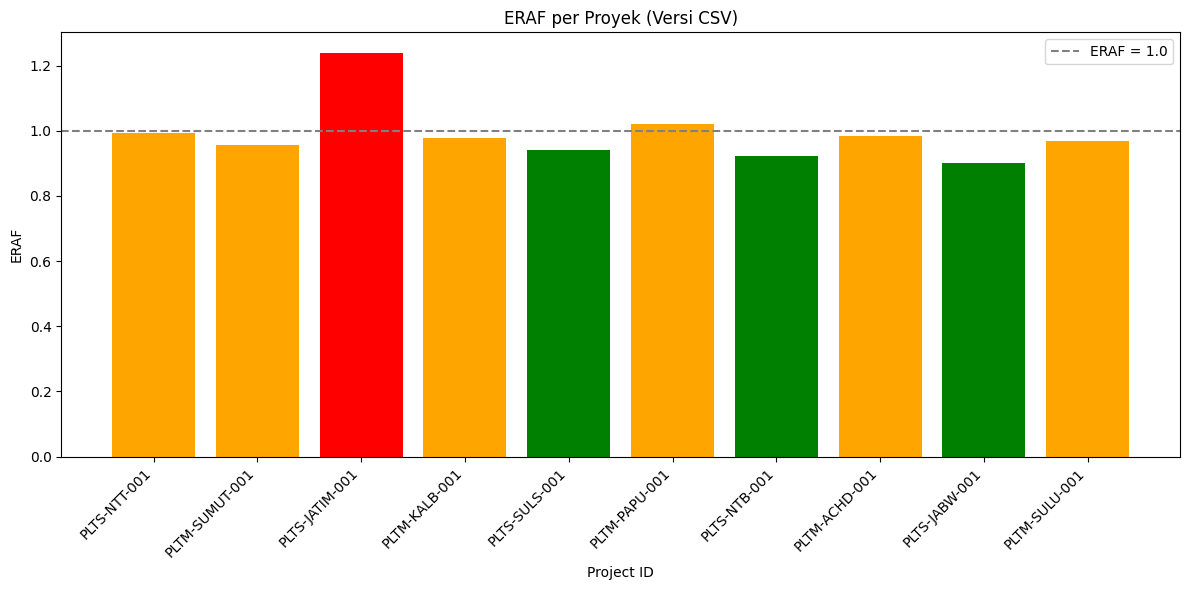

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari CSV
df = pd.read_csv("Economic.csv")

# Menambahkan data makro asumsi yang ideal
df["Inflation_Rate"] = 3.0
df["Unemployment_Rate"] = 4.0
df["FDI_Inflows"] = 4.5  # Katalis hijau tinggi

# Parameter baseline dan bobot
inflation_base = 3.0
unemployment_base = 5.0
gdp_base = 5.5
w1, w2, w3 = 0.4, 0.3, 0.3

# Hitung ERAF
df["ERAF"] = 1 + (
    w1 * (df["Inflation_Rate"] - inflation_base) / inflation_base +
    w2 * (df["Unemployment_Rate"] - unemployment_base) / unemployment_base -
    w3 * (df["GDP_Growth"] - gdp_base) / gdp_base
)

# Kategori Risiko
df["Kategori_Risiko"] = df["ERAF"].apply(lambda x: "Tinggi" if x > 1.05 else ("Rendah" if x < 0.95 else "Sedang"))

# Katalis Investasi
df["Katalis_Investasi"] = df["FDI_Inflows"].apply(
    lambda x: "FDI Tinggi (Katalis Hijau)" if x >= 4.0 else ("FDI Cukup" if x >= 2.5 else "FDI Rendah")
)

# Status Pendanaan
def status(row):
    if row["ERAF"] < 1 and row["FDI_Inflows"] >= 4.0:
        return "Layak Investasi Hijau"
    elif row["ERAF"] <= 1.05 and row["FDI_Inflows"] >= 2.5:
        return "Cukup Layak"
    else:
        return "Risiko Tinggi / FDI Lemah"
df["Status_Pendanaan"] = df.apply(status, axis=1)

# Tampilkan hasil akhir
df[["Project_ID", "GDP_Growth", "Inflation_Rate", "Unemployment_Rate", "FDI_Inflows", "ERAF", "Kategori_Risiko", "Status_Pendanaan"]]


# Plot hasil ERAF
plt.figure(figsize=(12, 6))
colors = df["Kategori_Risiko"].map({"Tinggi": "red", "Sedang": "orange", "Rendah": "green"})
plt.bar(df["Project_ID"], df["ERAF"], color=colors)
plt.axhline(1.0, color="gray", linestyle="--", label="ERAF = 1.0")
plt.title("ERAF per Proyek (Versi CSV)")
plt.xlabel("Project ID")
plt.ylabel("ERAF")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


# GEOSPATIAL DATASET


=== Hasil Analisis GRI Proyek ===
       Project_ID                           Konteks_Geospasial   GRI  \
0    PLTS-NTT-001         Sumba: radiasi tinggi-dekat jaringan  0.21   
1  PLTM-SUMUT-001        Tapanuli: debit stabil-akses PLN baik  0.37   
2  PLTS-JATIM-001        Surabaya: radiasi baik-jaringan dekat  0.48   
3   PLTM-KALB-001         Kalbar: debit tinggi-jaringan sedang  0.41   
4   PLTS-SULS-001          Makassar: radiasi tinggi-akses baik  0.20   
5   PLTM-PAPU-001              Papua: debit kuat-jaringan jauh  0.79   
6    PLTS-NTB-001            Lombok: radiasi optimal-dekat PLN  0.00   
7   PLTM-ACHD-001              Aceh: debit stabil-akses sedang  0.00   
8   PLTS-JABW-001  Bandung: radiasi baik-jaringan sangat dekat  0.00   
9   PLTM-SULU-001         Sulut: debit baik-jaringan agak jauh  0.00   

                    Risk_Level  
0                   Low Risk ✅  
1                   Low Risk ✅  
2               Medium Risk ⚠️  
3               Medium Risk ⚠️  
4      

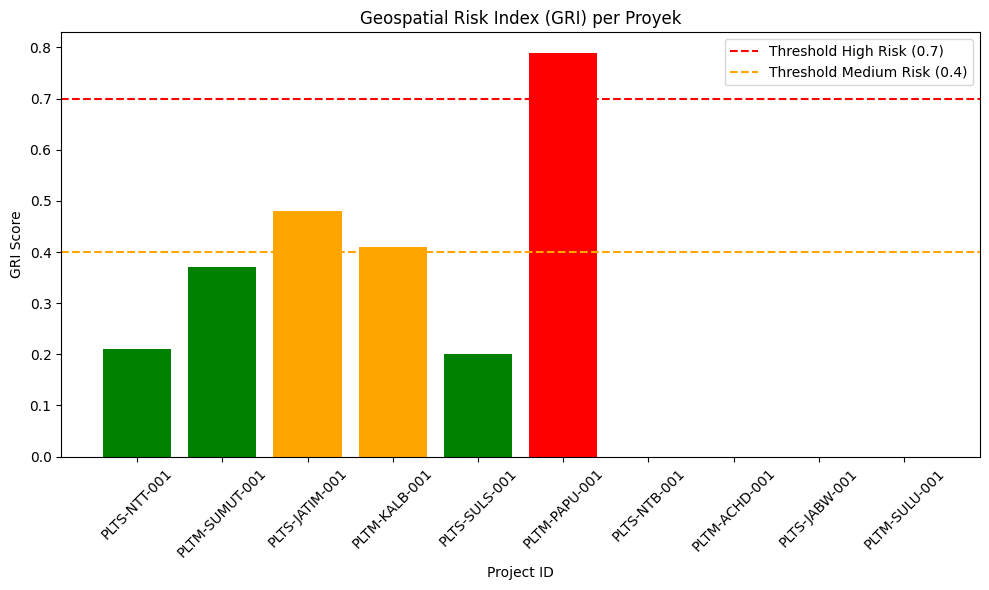

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
df = pd.read_csv("Geospatial.csv")

# Kamus skor spasial berdasarkan lokasi (simulasi dari Ina-Geoportal, KLHK, BNPB)
skor_spasial = {
    "Sumba":     {"S_hazard": 0.3, "S_proximity": 0.2, "S_landuse": 0.1},
    "Tapanuli":  {"S_hazard": 0.4, "S_proximity": 0.5, "S_landuse": 0.2},
    "Surabaya":  {"S_hazard": 0.6, "S_proximity": 0.5, "S_landuse": 0.3},
    "Kalbar":    {"S_hazard": 0.5, "S_proximity": 0.4, "S_landuse": 0.3},
    "Makassar":  {"S_hazard": 0.2, "S_proximity": 0.3, "S_landuse": 0.1},
    "Papua":     {"S_hazard": 0.7, "S_proximity": 0.9, "S_landuse": 0.8}
}

# Fungsi untuk ambil skor dari nama lokasi dalam Konteks_Geospasial
def ambil_skor(konteks):
    for lokasi in skor_spasial:
        if lokasi.lower() in konteks.lower():
            return pd.Series(skor_spasial[lokasi])
    return pd.Series({"S_hazard": 0.0, "S_proximity": 0.0, "S_landuse": 0.0})

# Tambahkan skor spasial ke dataframe
df[["S_hazard", "S_proximity", "S_landuse"]] = df["Konteks_Geospasial"].apply(ambil_skor)

# Hitung GRI (dengan bobot dari AHP atau konsensus)
w1, w2, w3 = 0.4, 0.3, 0.3
df["GRI"] = (w1 * df["S_hazard"] +
             w2 * df["S_proximity"] +
             w3 * df["S_landuse"])

# Klasifikasi tingkat risiko
def klasifikasi_risiko(gri):
    if gri > 0.7:
        return "High Risk 🚨 (due diligence)"
    elif gri > 0.4:
        return "Medium Risk ⚠️"
    else:
        return "Low Risk ✅"

df["Risk_Level"] = df["GRI"].apply(klasifikasi_risiko)

# Tampilkan hasil akhir
print("\n=== Hasil Analisis GRI Proyek ===")
print(df[["Project_ID", "Konteks_Geospasial", "GRI", "Risk_Level"]])

# Visualisasi GRI
plt.figure(figsize=(10,6))
colors = df['Risk_Level'].map({
    "High Risk 🚨 (due diligence)": "red",
    "Medium Risk ⚠️": "orange",
    "Low Risk ✅": "green"
})
plt.bar(df["Project_ID"], df["GRI"], color=colors)
plt.axhline(0.7, color='red', linestyle='--', label='Threshold High Risk (0.7)')
plt.axhline(0.4, color='orange', linestyle='--', label='Threshold Medium Risk (0.4)')
plt.title("Geospatial Risk Index (GRI) per Proyek")
plt.xlabel("Project ID")
plt.ylabel("GRI Score")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
